The following question is implemented using the following [tutorial](https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=FsePPpwZSmqt) 

In [2]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 5.2 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=a09180b946fa11af5fcafa03630f786bade4e956805bc5b8ec969a37c8e6657e
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 781 kB/s 
     |████████████████████████████████| 49 kB 2.7 MB/s 
     |████████████████████████████████| 145 kB 10.5 MB/s 
     |████████████████████████████████| 74 kB 3.5 MB/s 
     |████████████████████████████████| 130 kB 37.8 MB/s 
     |████████████████████████████████| 843 kB 24.2 MB/s 
     |███████████████████████████████

In [105]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# Import libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


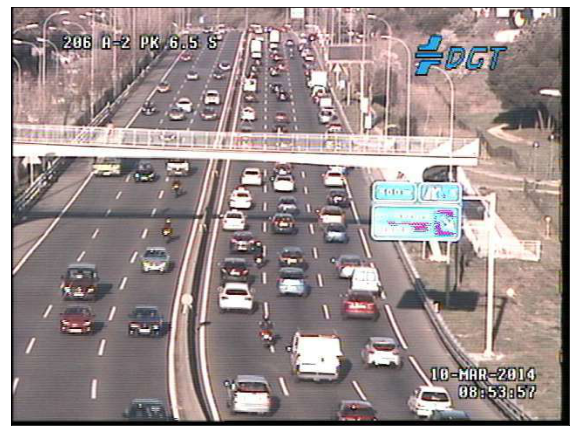

In [94]:
from google.colab import drive
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
drive.mount('/content/drive')

# Read Traffic Image
path = '/content/drive/My Drive/University/ECSE-415/ECSE_415_F_2021_Project/vehiclecounting/TRANCOS/TRANCOS/'
im = mpimg.imread(path + 'image-1-000001.jpg', 0)
plt.figure(figsize=(10,10)), plt.xticks([]), plt.yticks([])
plt.imshow(im)

In [102]:
cfg = get_cfg()
# Run Pre-Trained model
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6  # Increased the threshold for NMS such that only the box with the highest score within the same coordinates is kept
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


In [103]:
# Extract boxes coordinates to draw boxes
output_pred_boxes = outputs["instances"].pred_boxes
box_coord = []
for i in output_pred_boxes.__iter__():
  box_coord.append(tuple(i.cpu().numpy()))

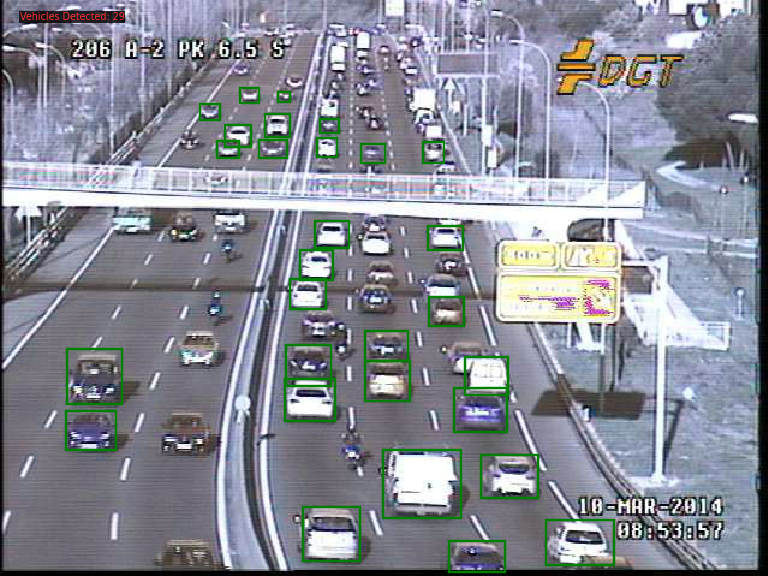

In [111]:
# Draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)

# Draw boxes on image
for coord in box_coord:
  out = v.draw_box(coord, alpha = 1)
# Write count of vehicles detected
v.draw_text('Vehicles Detected: ' + str(len(box_coord)), (60,10), color = 'r')
cv2_imshow(out.get_image()[:, :, ::-1])